# Load Data Set

In [1]:
import pandas as pd

In [2]:
# define column names
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [3]:
# loading training data
df = pd.read_csv('dataset/iris.data', header=None, names=names)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Visualize Data Set

In [4]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
# can choose different styles
# print(plt.style.available)
plt.style.use('fivethirtyeight')
# list available fonts: [f.name for f in matplotlib.font_manager.fontManager.ttflist]
matplotlib.rc('font', family='DejaVu Sans') 

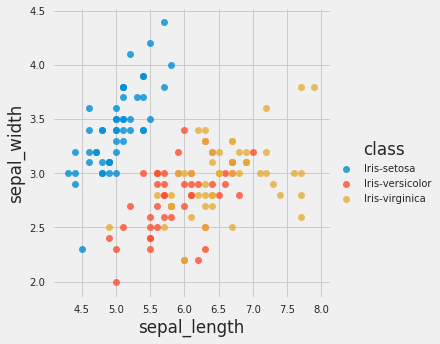

In [5]:
sns.lmplot('sepal_length', 'sepal_width', data=df, hue='class', fit_reg=False)
plt.show()

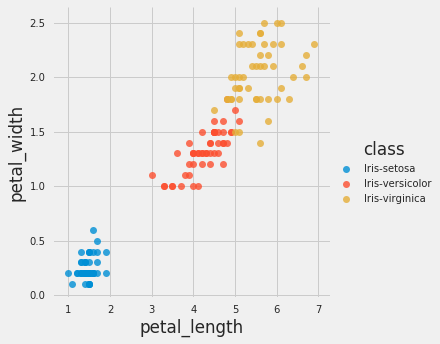

In [6]:
sns.lmplot('petal_length', 'petal_width', data=df, hue='class', fit_reg=False)
plt.show()

# Train

## Split test and train data

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

In [8]:
# create design matrix X and target vector Y
X = np.array(df.ix[:, 0:4]) # end index is exclusive
y = np.array(df['class']) # another way of indexing a pandas df

In [9]:
print('{}, {}'.format(len(X), len(y)))

150, 150


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
print('X_train {}, X_test {}, y_train {}, y_test {}'.format(len(X_train), len(X_test), len(y_train), len(y_test)))

X_train 100, X_test 50, y_train 100, y_test 50


## Define classifer

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [13]:
# instantiate lerning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=11)

In [14]:
# fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [15]:
# predict the response
pred = knn.predict(X_test)

In [16]:
print(accuracy_score(y_test, pred))

1.0


# k-fold cross validation
[!] Using the test set for hyperparameter tuning can lead to overfitting.

In [17]:
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,64))

In [18]:
# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [19]:
# empty list that will hold cv scores
cv_scores = []

In [20]:
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

## plot the misclassification error versus K

In [21]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

In [22]:
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]

In [23]:
print ('the optimal number of neighbors is {}'.format(optimal_k))

the optimal number of neighbors is 7


## scores the missclassification error for pure KNeighborsClassifier

In [24]:
cv_scores_for_test = []
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    cv_scores_for_test.append(accuracy_score(y_test, knn.predict(X_test)))
    
MSE_test = [1 - x for x in cv_scores_for_test]

In [25]:
# for [:2] features
# perform 10-fold cross validation
cv_scores_for_test_0_2 = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train[:,:2], y_train)
    cv_scores_for_test_0_2.append(accuracy_score(y_test, knn.predict(X_test[:,:2])))
    
MSE_test_0_2 = [1 - x for x in cv_scores_for_test_0_2]

In [26]:
# for [2:4] features
# perform 10-fold cross validation
cv_scores_for_test_2_4 = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train[:,2:4], y_train)
    cv_scores_for_test_2_4.append(accuracy_score(y_test, knn.predict(X_test[:,2:4])))
    
MSE_test_2_4 = [1 - x for x in cv_scores_for_test_2_4]

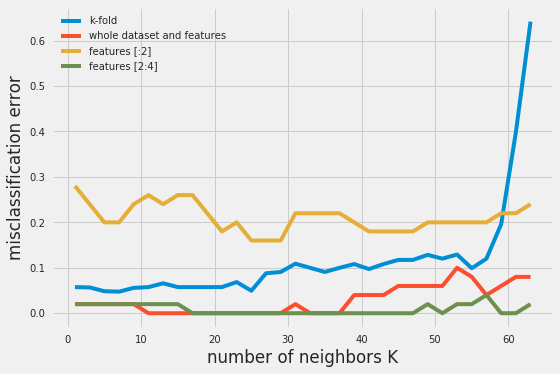

In [27]:
# plot miscllassification error vs k
plt.plot(neighbors, MSE, label='k-fold')
plt.plot(neighbors, MSE_test, label='whole dataset and features')
plt.plot(neighbors, MSE_test_0_2, label='features [:2]')
plt.plot(neighbors, MSE_test_2_4, label='features [2:4]')
plt.xlabel('number of neighbors K')
plt.ylabel('misclassification error')
plt.legend()
plt.show()

# K-nn from scratch

In [28]:
import collections

In [29]:
def train(X_train, y_train):
    # do nothing
    return

In [30]:
def predict(X_train, y_train, x_test, k):
    # first we compute the euclidean distance
    distances = [
        [np.sqrt(np.sum(np.square(x_test - x_train))), i] 
        for i, x_train in enumerate(X_train)
    ]
        
    # sort the list
    distances = sorted(distances)
    
    # make a list of the k neighbors' targets
    targets = [y_train[distance[1]] for distance in distances[:k]]
        
    # return most common target
    return collections.Counter(targets).most_common(1)[0][0]

In [31]:
def k_nearest_neighbour(X_train, y_train, X_test, k):
    # train on the input data
    train(X_train, y_train)
    
    # loop over all observations
    return [predict(X_train, y_train, x_test, k) for x_test in X_test]

In [32]:
# making our predictions 
pred = k_nearest_neighbour(X_train, y_train, X_test, 1)

# transform the list into an array
pred = np.asarray(pred)

# evaluating accuracy
accuracy = accuracy_score(y_test, pred)
print('\nThe accuracy of our classifier is {}'.format(accuracy))


The accuracy of our classifier is 0.98


### get prediction for [:2] features

In [33]:
# making our predictions 
pred = k_nearest_neighbour(X_train[:,:2], y_train, X_test[:,:2], 1)

# transform the list into an array
pred = np.asarray(pred)

# evaluating accuracy
accuracy = accuracy_score(y_test, pred)
print('\nThe accuracy of our classifier is {}'.format(accuracy))


The accuracy of our classifier is 0.78


### get prediction for [2:4] features

In [34]:
# making our predictions 
pred = k_nearest_neighbour(X_train[:,2:4], y_train, X_test[:,2:4], 1)

# transform the list into an array
pred = np.asarray(pred)

# evaluating accuracy
accuracy = accuracy_score(y_test, pred)
print('\nThe accuracy of our classifier is {}'.format(accuracy))


The accuracy of our classifier is 0.98
